In [141]:
import pandas as pd
tests = pd.read_csv("../notebooks/datasets/test_page_objects.csv")
#tests['calls'] = 1
tests['id'] = pd.factorize(tests.page_method)[0] + 1
tests['calls'] = 1

tests

,test_method,page_object,page_method,id,calls
0,testLogin,StartPage,goToStartSite,1,1
1,testLogin,StartPage,clickLogin,2,1
2,testLogin,StartPage,typeUser,3,1
3,testLogin,StartPage,typePassword,4,1
4,testLogin,StartPage,checkLogin,5,1
5,testUserNameChange,StartPage,goToStartSite,1,1
6,testUserNameChange,StartPage,clickLogin,2,1
7,testUserNameChange,StartPage,typeUser,3,1
8,testUserNameChange,StartPage,typePassword,4,1
9,testUserNameChange,StartPage,goToSettings,6,1


In [142]:
grouped = tests.groupby(['test_method','page_object', 'page_method' ], sort=False)[['id']].sum()
test_matrix = grouped.unstack(level=[1,2])
test_matrix = test_matrix.fillna(0)
#test_matrix = test_matrix.cumsum(axis=1)
test_matrix

id                                   \
page_object                StartPage                                    
page_method            goToStartSite clickLogin typeUser typePassword   
test_method                                                             
testLogin                        1.0        2.0      3.0          4.0   
testUserNameChange               1.0        2.0      3.0          4.0   
testNewBlogPost                  1.0        2.0      3.0          4.0   
testReadLatestBlogPost           1.0        0.0      0.0          0.0   

                                                               \
page_object                                          UserPage   
page_method            checkLogin goToSettings changePassword   
test_method                                                     
testLogin                     5.0          0.0            0.0   
testUserNameChange            0.0          6.0            7.0   
testNewBlogPost               0.0          0.0            0.0   
testReadLatestBlogPost        0.0          0.0            0.0   

                                                                     \
page_object                                               StartPage   
page_method            checkChangedPassword logOff clickNewBlogPost   
test_method                                                           
testLogin                               0.0    0.0              0.0   
testUserNameChange                      8.0    9.0              0.0   
testNewBlogPost                         0.0    0.0             10.0   
testReadLatestBlogPost                  0.0    0.0              0.0   

                                                                  
page_object                 BlogPage                   StartPage  
page_method            checkBlogPost logOff clickLatestBlogPosts  
test_method                                                       
testLogin                        0.0    0.0                  0.0  
testUserNameChange               0.0    0.0                  0.0  
testNewBlogPost                 11.0    9.0                  0.0  
testReadLatestBlogPost          11.0    9.0                 12.0

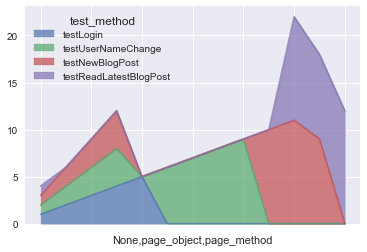

In [143]:
test_matrix.T.plot.area(alpha=0.7)

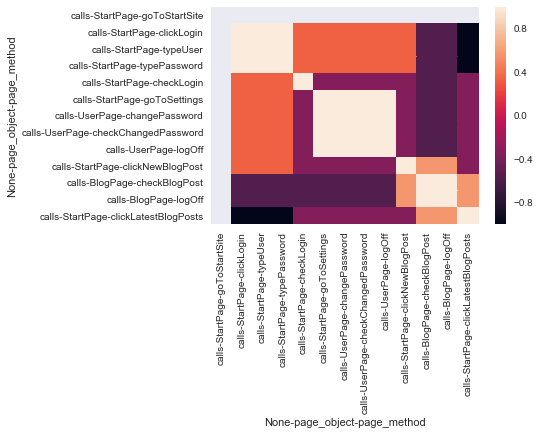

In [157]:
sns.heatmap(test_matrix.corr())

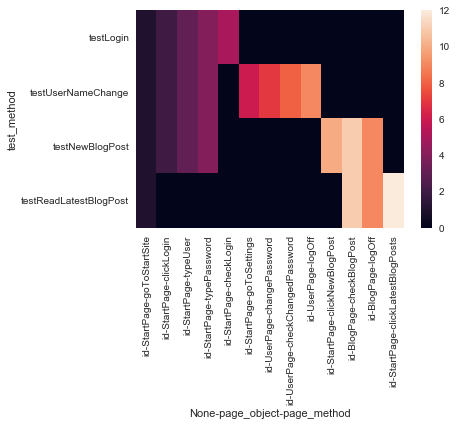

In [144]:
sns.heatmap(test_matrix)

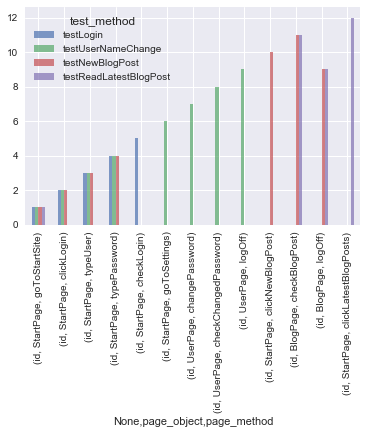

In [145]:
test_matrix.T.plot.bar(alpha=0.7)

In [146]:
grouped = tests.groupby(['test_method','page_object', 'page_method' ], sort=False)[['calls']].count()
test_matrix = grouped.unstack(level=[1,2])
test_matrix = test_matrix.fillna(0)
#test_matrix = test_matrix.cumsum(axis=1)
test_matrix

calls                                   \
page_object                StartPage                                    
page_method            goToStartSite clickLogin typeUser typePassword   
test_method                                                             
testLogin                        1.0        1.0      1.0          1.0   
testUserNameChange               1.0        1.0      1.0          1.0   
testNewBlogPost                  1.0        1.0      1.0          1.0   
testReadLatestBlogPost           1.0        0.0      0.0          0.0   

                                                               \
page_object                                          UserPage   
page_method            checkLogin goToSettings changePassword   
test_method                                                     
testLogin                     1.0          0.0            0.0   
testUserNameChange            0.0          1.0            1.0   
testNewBlogPost               0.0          0.0            0.0   
testReadLatestBlogPost        0.0          0.0            0.0   

                                                                     \
page_object                                               StartPage   
page_method            checkChangedPassword logOff clickNewBlogPost   
test_method                                                           
testLogin                               0.0    0.0              0.0   
testUserNameChange                      1.0    1.0              0.0   
testNewBlogPost                         0.0    0.0              1.0   
testReadLatestBlogPost                  0.0    0.0              0.0   

                                                                  
page_object                 BlogPage                   StartPage  
page_method            checkBlogPost logOff clickLatestBlogPosts  
test_method                                                       
testLogin                        0.0    0.0                  0.0  
testUserNameChange               0.0    0.0                  0.0  
testNewBlogPost                  1.0    1.0                  0.0  
testReadLatestBlogPost           1.0    1.0                  1.0

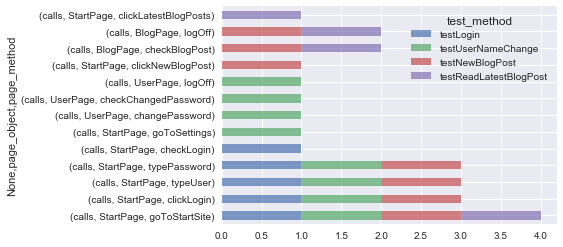

In [147]:
test_matrix.T.plot.barh(alpha=0.7, stacked=True)

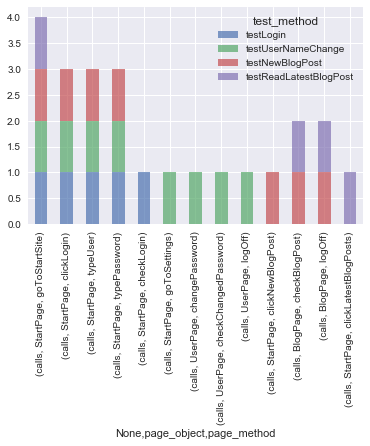

In [148]:
test_matrix.T.plot.bar(alpha=0.7, stacked=True)

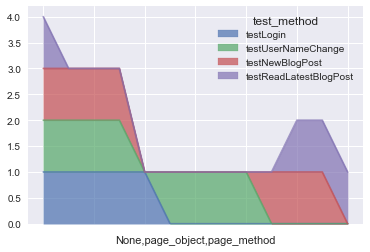

In [149]:
test_matrix.T.plot.area(alpha=0.7, stacked=True)

In [161]:
import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def get_iris_data():
    """Get the iris data, from local csv or pandas repo."""
    if os.path.exists("iris.csv"):
        print("-- iris.csv found locally")
        df = pd.read_csv("iris.csv", index_col=0)
    else:
        print("-- trying to download from github")
        fn = "https://raw.githubusercontent.com/pydata/pandas/" + \
             "master/pandas/tests/data/iris.csv"
        try:
            df = pd.read_csv(fn)
        except:
            exit("-- Unable to download iris.csv")

        with open("iris.csv", 'w') as f:
            print("-- writing to local iris.csv file")
            df.to_csv(f)

    return df

df = get_iris_data()

-- trying to download from github
-- writing to local iris.csv file


In [163]:
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [184]:
df = test_matrix.reset_index()
df

test_method         calls                      \
page_object                             StartPage                       
page_method                         goToStartSite clickLogin typeUser   
0                         testLogin           1.0        1.0      1.0   
1                testUserNameChange           1.0        1.0      1.0   
2                   testNewBlogPost           1.0        1.0      1.0   
3            testReadLatestBlogPost           1.0        0.0      0.0   

                                                                 \
page_object                                            UserPage   
page_method typePassword checkLogin goToSettings changePassword   
0                    1.0        1.0          0.0            0.0   
1                    1.0        0.0          1.0            1.0   
2                    1.0        0.0          0.0            0.0   
3                    0.0        0.0          0.0            0.0   

                                                                               \
page_object                                    StartPage      BlogPage          
page_method checkChangedPassword logOff clickNewBlogPost checkBlogPost logOff   
0                            0.0    0.0              0.0           0.0    0.0   
1                            1.0    1.0              0.0           0.0    0.0   
2                            0.0    0.0              1.0           1.0    1.0   
3                            0.0    0.0              0.0           1.0    1.0   

                                  
page_object            StartPage  
page_method clickLatestBlogPosts  
0                            0.0  
1                            0.0  
2                            0.0  
3                            1.0

In [185]:
def encode_target(df, target_column):

    df_mod = df.copy()
    targets = df_mod[target_column].unique()
    map_to_int = {name: n for n, name in enumerate(targets)}
    df_mod["Target"] = df_mod[target_column].replace(map_to_int)

    return (df_mod, targets)

df2, targets = encode_target(df, "test_method")
df2.head()

test_method         calls                      \
page_object                             StartPage                       
page_method                         goToStartSite clickLogin typeUser   
0                         testLogin           1.0        1.0      1.0   
1                testUserNameChange           1.0        1.0      1.0   
2                   testNewBlogPost           1.0        1.0      1.0   
3            testReadLatestBlogPost           1.0        0.0      0.0   

                                                                 \
page_object                                            UserPage   
page_method typePassword checkLogin goToSettings changePassword   
0                    1.0        1.0          0.0            0.0   
1                    1.0        0.0          1.0            1.0   
2                    1.0        0.0          0.0            0.0   
3                    0.0        0.0          0.0            0.0   

                                                                               \
page_object                                    StartPage      BlogPage          
page_method checkChangedPassword logOff clickNewBlogPost checkBlogPost logOff   
0                            0.0    0.0              0.0           0.0    0.0   
1                            1.0    1.0              0.0           0.0    0.0   
2                            0.0    0.0              1.0           1.0    1.0   
3                            0.0    0.0              0.0           1.0    1.0   

                                 Target  
page_object            StartPage         
page_method clickLatestBlogPosts         
0                            0.0      0  
1                            0.0      1  
2                            0.0      2  
3                            1.0      3

In [196]:
features = list(df2.columns[1:-1])
features

[('calls', 'StartPage', 'goToStartSite'),
 ('calls', 'StartPage', 'clickLogin'),
 ('calls', 'StartPage', 'typeUser'),
 ('calls', 'StartPage', 'typePassword'),
 ('calls', 'StartPage', 'checkLogin'),
 ('calls', 'StartPage', 'goToSettings'),
 ('calls', 'UserPage', 'changePassword'),
 ('calls', 'UserPage', 'checkChangedPassword'),
 ('calls', 'UserPage', 'logOff'),
 ('calls', 'StartPage', 'clickNewBlogPost'),
 ('calls', 'BlogPage', 'checkBlogPost'),
 ('calls', 'BlogPage', 'logOff'),
 ('calls', 'StartPage', 'clickLatestBlogPosts')]

In [218]:
y = df2["Target"]
X = df2[features]
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [217]:
def visualize_tree(tree, feature_names):
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names, 
                        
                        label=None,
                        leaves_parallel=True,
                        impurity=False,
                        class_names=df2.test_method)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")
        
visualize_tree(dt, features)

In [150]:
from sklearn.metrics.pairwise import cosine_similarity

test_sim = cosine_similarity(test_matrix)
test_sim

array([[ 1.        ,  0.63245553,  0.6761234 ,  0.2236068 ],
       [ 0.63245553,  1.        ,  0.53452248,  0.1767767 ],
       [ 0.6761234 ,  0.53452248,  1.        ,  0.56694671],
       [ 0.2236068 ,  0.1767767 ,  0.56694671,  1.        ]])

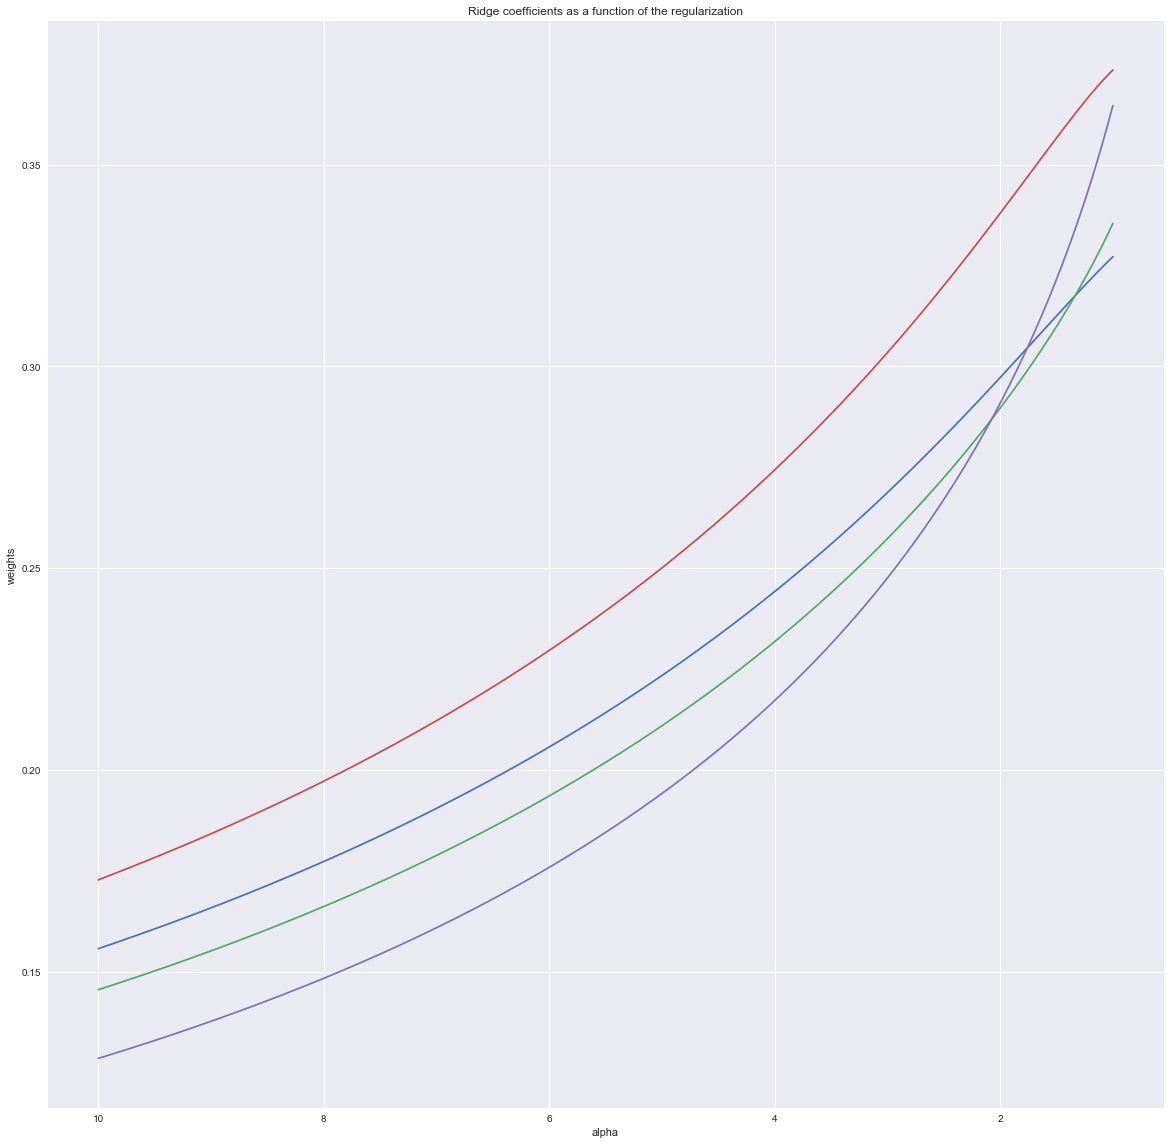

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
y = np.ones(len(test_sim.T))
y

X = test_sim.T
X

# #############################################################################
# Compute paths

n_alphas = 2000
alphas = np.logspace(0, 1, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

    
    
# #############################################################################
# Display results
plt.figure(figsize=[20,20])
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.500000,0.333333,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000
1,0.500000,0.333333,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909
2,0.333333,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333
3,0.250000,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923
4,0.200000,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429
5,0.166667,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667
6,0.142857,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500
7,0.125000,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,0.058824
8,0.111111,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,0.058824,0.055556
9,0.100000,0.090909,0.083333,0.076923,0.071429,0.066667,0.062500,0.058824,0.055556,0.052632


In [153]:
import pandas as pd

distance_df = pd.read_excel(
    "../notebooks/datasets/test_distance_matrix.xlsx",
    index_col=[0,1],
    header=[0,1])
# show only subset of data
distance_df.iloc[:5,:2]


X = 1- distance_df.iloc[0:10,0:10].values
X

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.95940322

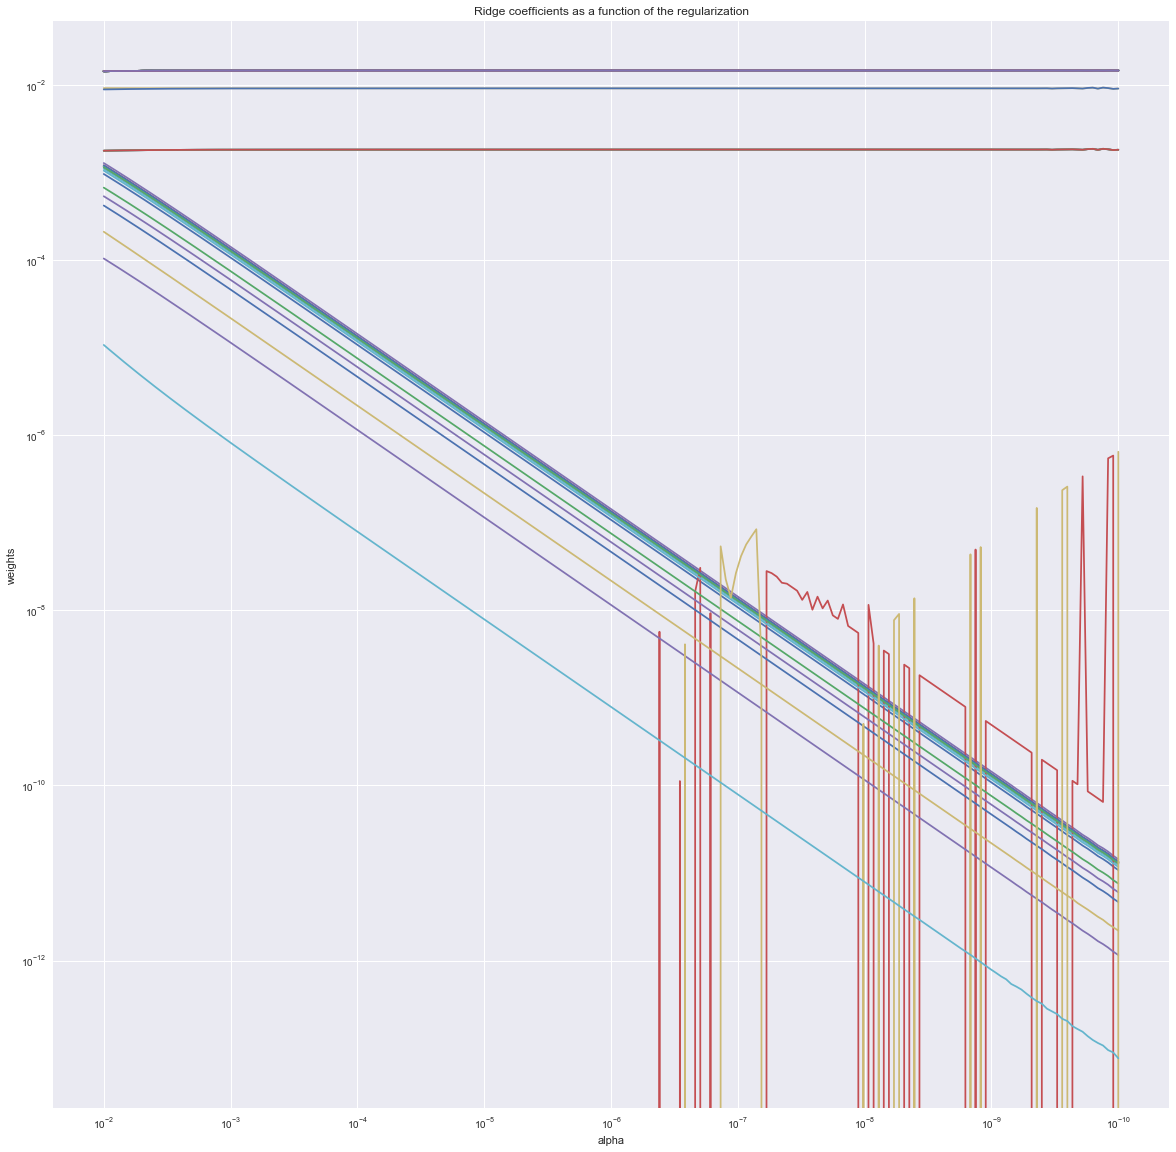

In [154]:
import pandas as pd

tests = pd.read_csv("../notebooks/datasets/test_code_invocations.csv", sep=";")
tests.head()
invocation_matrix = tests.pivot_table(
    index=['test_type', 'test_method'],
    columns=['prod_type', 'prod_method'],
    values='invocations', 
    fill_value=0
)

y = np.ones(100)
X = 1-invocation_matrix.iloc[0:100,0:100].values
X

# #############################################################################
# Compute paths

n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)

coefs = []
for a in alphas:
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

# #############################################################################
# Display results
plt.figure(figsize=[20,20])
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis

plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()